<a href="https://colab.research.google.com/github/MasterNathan01/4105/blob/main/WatersNathan_801283595_HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Device: cuda
Files already downloaded and verified
Files already downloaded and verified

Training Baseline CNN...
Baseline CNN Epoch [10/200], Loss: 0.7314, Accuracy: 72.82%
Baseline CNN Epoch [20/200], Loss: 0.5852, Accuracy: 76.36%
Baseline CNN Epoch [30/200], Loss: 0.5157, Accuracy: 77.91%
Baseline CNN Epoch [40/200], Loss: 0.4627, Accuracy: 77.34%
Baseline CNN Epoch [50/200], Loss: 0.4298, Accuracy: 78.53%
Baseline CNN Epoch [60/200], Loss: 0.4013, Accuracy: 79.11%
Baseline CNN Epoch [70/200], Loss: 0.3822, Accuracy: 79.02%
Baseline CNN Epoch [80/200], Loss: 0.3653, Accuracy: 78.44%
Baseline CNN Epoch [90/200], Loss: 0.3459, Accuracy: 79.27%
Baseline CNN Epoch [100/200], Loss: 0.3389, Accuracy: 79.97%
Baseline CNN Epoch [110/200], Loss: 0.3257, Accuracy: 79.66%
Baseline CNN Epoch [120/200], Loss: 0.3104, Accuracy: 79.93%
Baseline CNN Epoch [130/200], Loss: 0.3016, Accuracy: 79.65%
Baseline CNN Epoch [140/200], Loss: 0.2964, Accuracy: 79.99%
Baseline CNN Epoch [150/200], Loss: 0.28

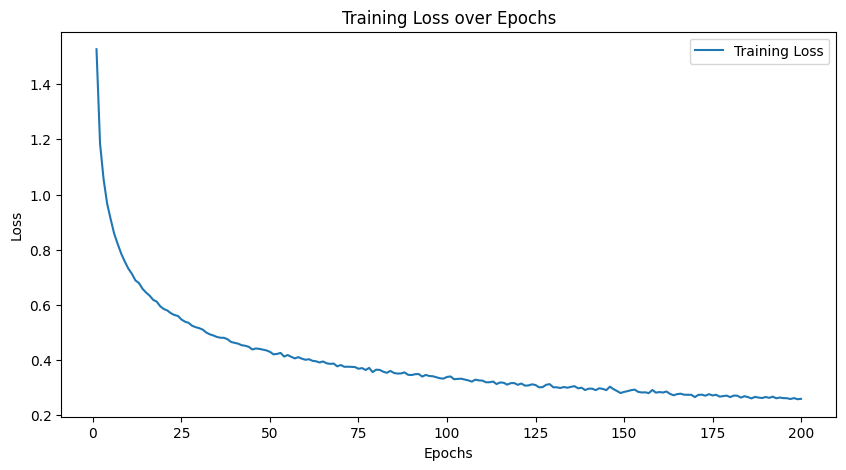

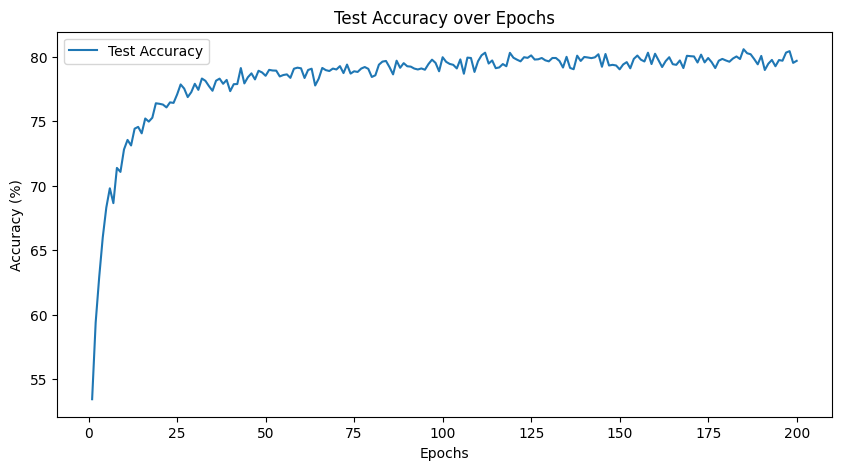

In [4]:
#Problem 1a
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")

batch_size = 128
learning_rate = 0.001
num_epochs = 200
report_interval = 10

transform = transforms.Compose([transforms.RandomHorizontalFlip(), transforms.RandomCrop(32, padding=4), transforms.ToTensor(), transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))])
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

class BaselineCNN(nn.Module):
    def __init__(self):
        super(BaselineCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(64 * 8 * 8, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = BaselineCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

print("\nTraining Baseline CNN...")
start_time = time.time()

baseline_epoch_losses = []
baseline_epoch_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    baseline_epoch_losses.append(epoch_loss)

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100.0 * correct / total
    baseline_epoch_accuracies.append(accuracy)

    if (epoch + 1) % report_interval == 0:
        print(f"Baseline CNN Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.2f}%")

end_time = time.time()
baseline_training_time = end_time - start_time
baseline_final_loss = baseline_epoch_losses[-1]
baseline_final_accuracy = baseline_epoch_accuracies[-1]
baseline_params = sum(p.numel() for p in model.parameters())

print("Baseline CNN:")
print(f"Baseline CNN Total Training Time: {baseline_training_time/60:.2f} minutes")
print(f" - Final Training Loss: {baseline_final_loss:.4f}")
print(f" - Final Test Accuracy: {baseline_final_accuracy:.2f}%")
print(f" - Number of Parameters: {baseline_params}")


plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), baseline_epoch_losses, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), baseline_epoch_accuracies, label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Test Accuracy over Epochs")
plt.legend()
plt.show()



Training Extended CNN...
Extended CNN Epoch [10/200], Loss: 0.6330, Accuracy: 76.66%
Extended CNN Epoch [20/200], Loss: 0.4813, Accuracy: 79.41%
Extended CNN Epoch [30/200], Loss: 0.4002, Accuracy: 80.88%
Extended CNN Epoch [40/200], Loss: 0.3533, Accuracy: 81.12%
Extended CNN Epoch [50/200], Loss: 0.3158, Accuracy: 81.04%
Extended CNN Epoch [60/200], Loss: 0.2946, Accuracy: 81.35%
Extended CNN Epoch [70/200], Loss: 0.2702, Accuracy: 81.73%
Extended CNN Epoch [80/200], Loss: 0.2605, Accuracy: 82.16%
Extended CNN Epoch [90/200], Loss: 0.2459, Accuracy: 81.73%
Extended CNN Epoch [100/200], Loss: 0.2350, Accuracy: 81.54%
Extended CNN Epoch [110/200], Loss: 0.2191, Accuracy: 82.15%
Extended CNN Epoch [120/200], Loss: 0.2137, Accuracy: 81.11%
Extended CNN Epoch [130/200], Loss: 0.2021, Accuracy: 82.36%
Extended CNN Epoch [140/200], Loss: 0.2048, Accuracy: 82.31%
Extended CNN Epoch [150/200], Loss: 0.2006, Accuracy: 81.86%
Extended CNN Epoch [160/200], Loss: 0.1822, Accuracy: 82.63%
Extende

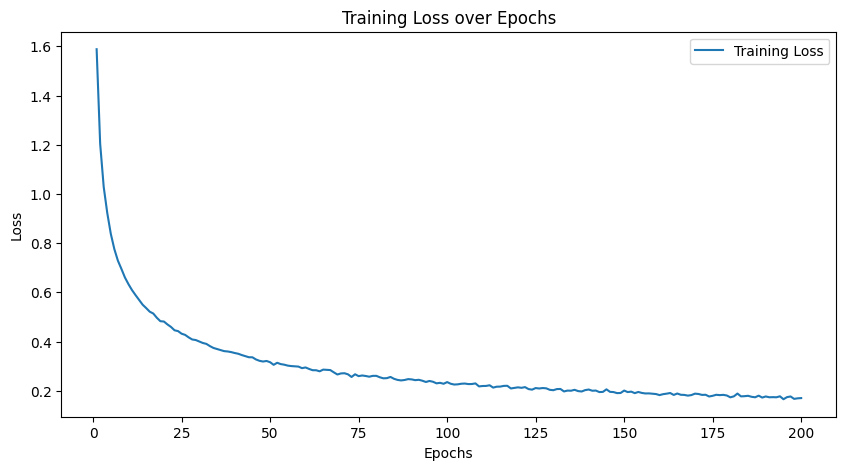

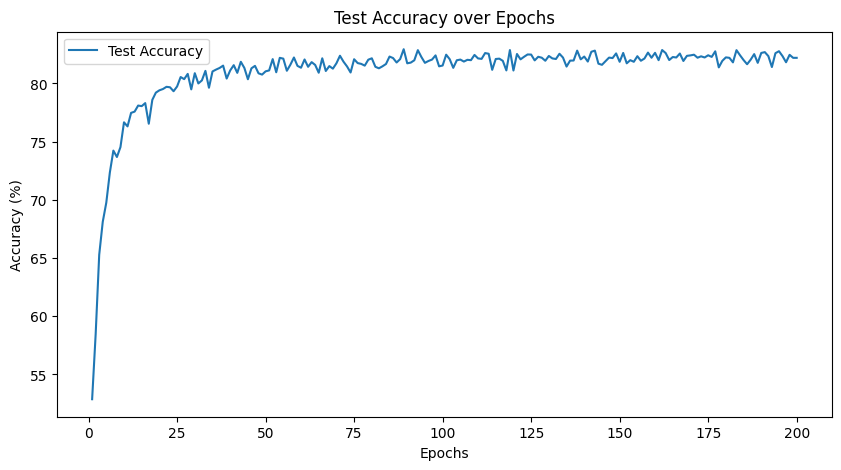

In [7]:
#Problem 1b
class DeeperCNN(nn.Module):
    def __init__(self):
        super(DeeperCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(128 * 4 * 4, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = x.view(-1, 128 * 4 * 4)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model_deeper = DeeperCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_deeper.parameters(), lr=learning_rate)

print("\nTraining Extended CNN...")
start_time = time.time()

extended_epoch_losses = []
extended_epoch_accuracies = []

for epoch in range(num_epochs):
    model_deeper.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_deeper(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    extended_epoch_losses.append(epoch_loss)

    model_deeper.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_deeper(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100.0 * correct / total
    extended_epoch_accuracies.append(accuracy)

    if (epoch + 1) % report_interval == 0:
        print(f"Extended CNN Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.2f}%")

end_time = time.time()
extended_training_time = end_time - start_time
extended_final_loss = extended_epoch_losses[-1]
extended_final_accuracy = extended_epoch_accuracies[-1]
extended_params = sum(p.numel() for p in model_deeper.parameters())

print("Extended CNN:")
print(f"Extended CNN Total Training Time: {extended_training_time/60:.2f} minutes")
print(f" - Final Training Loss: {extended_final_loss:.4f}")
print(f" - Final Test Accuracy: {extended_final_accuracy:.2f}%")
print(f" - Number of Parameters: {extended_params}")

plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), extended_epoch_losses, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), extended_epoch_accuracies, label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Test Accuracy over Epochs")
plt.legend()
plt.show()

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device: {device}")

batch_size = 128
learning_rate = 0.001
num_epochs = 200
report_interval = 10

transform = transforms.Compose([transforms.RandomHorizontalFlip(), transforms.RandomCrop(32, padding=4), transforms.ToTensor(), transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride,
                               padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1,
                               padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != planes * self.expansion:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, planes * self.expansion, kernel_size=1,
                          stride=stride, bias=False),
                nn.BatchNorm2d(planes * self.expansion)
            )

    def forward(self, x):
        out = self.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = self.relu(out)
        return out

class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = 64

        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1,
                               bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)

        self.layer1 = self._make_layer(block, 64,  num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)

        self.avgpool = nn.AdaptiveAvgPool2d((1,1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for s in strides:
            layers.append(block(self.in_planes, planes, s))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

model = ResNet(BasicBlock, [3,3,2,2]).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

print("\nTraining ResNet-10 on CIFAR-10...")
start_time = time.time()

epoch_losses = []
epoch_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_losses.append(epoch_loss)

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100.0 * correct / total
    epoch_accuracies.append(accuracy)

    if (epoch + 1) % report_interval == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.2f}%")

end_time = time.time()
training_time = end_time - start_time

final_loss = epoch_losses[-1]
final_accuracy = epoch_accuracies[-1]
model_params = sum(p.numel() for p in model.parameters())

print("ResNet-10:")
print(f"\nResNet-10 Total Training Time: {training_time/60:.2f} minutes")
print(f" - Final Training Loss: {final_loss:.4f}")
print(f" - Final Test Accuracy: {final_accuracy:.2f}%")
print(f" - Number of Parameters: {model_params}")

plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), epoch_losses, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), epoch_accuracies, label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Test Accuracy over Epochs")
plt.legend()
plt.show()